In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns

path = "../../../advTimeSeriesMachineLearning/dataSets/directMarketing.csv"
df_raw = pd.read_csv(path)
df_raw.head(10)

income  firstDate  lastDate  amount  freqSales saleSizeCode starCustomer  \
0       3       9409      9509    0.06          1            G            0   
1       2       9201      9602    0.16          4            G            X   
2       0       9510      9603    0.20          4            E            0   
3       6       9409      9603    0.13          2            G            0   
4       0       9310      9511    0.10          1            G            0   
5       2       9601      9609    0.14          2            F            0   
6       7       9510      9510    0.06          1            G            0   
7       5       9209      9512    0.39          4            E            X   
8       6       8702      9511    0.16          2            E            X   
9       0       9103      9508    0.23          1            E            X   

   lastSale  avrSale  class  
0        50    30.00      0  
1        20    20.55      1  
2         5     8.75      0  
3        25    22.50      0  
4        25    12.50      0  
5         5     7.75      0  
6        25    25.00      0  
7        10     7.65      0  
8        14     9.30      0  
9        11     9.15      0

Now that the data is loaded lets take a look at whats in it

In [2]:
df_raw.starCustomer.describe()

count     100000
unique         2
top            0
freq       52537
Name: starCustomer, dtype: object

Alright, from describing multiple columns it can be established that income, freqSales, saleSizeCode are categorical variables which have some intrinsic scale

starCustomer, class are nonmetric variables which serve as indicators

firstDate, lastDate, amount, avrSale, lastSale are all metric continuous variables

In [3]:
metric_var = ["firstDate", "lastDate", "amount", "avrSale", "lastSale"]
cat_var = ["starCustomer"]
#short for quantized
quant_var = ["income", "freqSales", "saleSizeCode"]
target = "class"

Lets make some of these catergorical variables numerical

In [4]:
df = df_raw
df["starCustomer"] = ((df.starCustomer == "X")).astype(int)

In [5]:
df.head(8)

income  firstDate  lastDate  amount  freqSales saleSizeCode  starCustomer  \
0       3       9409      9509    0.06          1            G             0   
1       2       9201      9602    0.16          4            G             1   
2       0       9510      9603    0.20          4            E             0   
3       6       9409      9603    0.13          2            G             0   
4       0       9310      9511    0.10          1            G             0   
5       2       9601      9609    0.14          2            F             0   
6       7       9510      9510    0.06          1            G             0   
7       5       9209      9512    0.39          4            E             1   

   lastSale  avrSale  class  
0        50    30.00      0  
1        20    20.55      1  
2         5     8.75      0  
3        25    22.50      0  
4        25    12.50      0  
5         5     7.75      0  
6        25    25.00      0  
7        10     7.65      0

In [6]:
for rows in range(100000):
    if(df["saleSizeCode"][rows] == "G"):
        df["saleSizeCode"][rows] = 4
    if(df["saleSizeCode"][rows] == "F"):
        df["saleSizeCode"][rows] = 3
    if(df["saleSizeCode"][rows] == "E"):
        df["saleSizeCode"][rows] = 2
    if(df["saleSizeCode"][rows] == "D"):
        df["saleSizeCode"][rows] = 1

/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/mycicle/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [7]:
df[100:140]

income  firstDate  lastDate  amount  freqSales saleSizeCode  \
100       7       8803      9511    0.24          4            1   
101       2       8611      9511    0.29          1            2   
102       3       8812      9512    0.27          1            2   
103       0       8708      9506    0.22          1            2   
104       0       8911      9506    0.27          1            2   
105       4       9109      9503    0.08          1            3   
106       0       8608      9512    0.15          1            4   
107       3       8702      9512    0.21          2            2   
108       2       8608      9504    0.27          1            2   
109       3       9401      9603    0.14          2            3   
110       4       9401      9511    0.25          3            2   
111       4       9310      9512    0.10          1            3   
112       4       8611      9702    0.35          1            2   
113       5       8608      9602    0.52          4            2   
114       4       9412      9508    0.13          2            3   
115       5       9109      9508    0.19          1            3   
116       6       8608      9512    0.31          3            1   
117       5       9010      9601    0.34          3            1   
118       0       9001      9512    0.11          1            3   
119       2       9102      9506    0.06          1            3   
120       4       9103      9504    0.08          1            3   
121       1       9109      9504    0.08          1            4   
122       7       9109      9511    0.07          1            4   
123       2       9011      9507    0.11          1            3   
124       2       8912      9512    0.10          1            3   
125       0       8702      9504    0.18          1            3   
126       4       9309      9603    0.17          3            3   
127       2       9102      9601    0.13          1            3   
128       7       9602      9602    0.06          1            3   
129       6       9501      9603    0.08          1            4   
130       4       8807      9512    0.13          1            3   
131       3       8612      9511    0.09          2            4   
132       0       9211      9511    0.28          3            2   
133       6       9510      9602    0.07          1            4   
134       0       8804      9507    0.23          2            2   
135       5       8712      9601    0.12          1            4   
136       7       9401      9509    0.15          1            3   
137       0       9410      9504    0.11          1            3   
138       7       9402      9601    0.16          1            3   
139       3       8909      9611    0.13          2            2   

     starCustomer  lastSale  avrSale  class  
100             1         5     4.88      0  
101             1        10     7.47      0  
102             1        10     3.70      0  
103             1        10    11.23      0  
104             1        12    10.58      0  
105             0        15    14.25      0  
106             1        25    15.56      0  
107             1        10     7.75      0  
108             1        10     5.50      0  
109             0        15     9.00      0  
110             0        12     8.14      0  
111             0        20    12.00      0  
112             1        15     8.29      0  
113             1         5     7.12      0  
114             0        20    18.33      0  
115             1        15    11.40      0  
116             1         5     2.88      0  
117             1         6     5.50      0  
118             0        20    12.16      0  
119             0        15    16.66      0  
120             0        15    10.00      0  
121             0        25    12.50      0  
122             0        65    50.00      0  
123             1        16    13.50      0  
124             0        19    16.66      0  
125             1   

Now that everything is numerial we can do some visualizations
First up lets do some histograms for the categorical variables

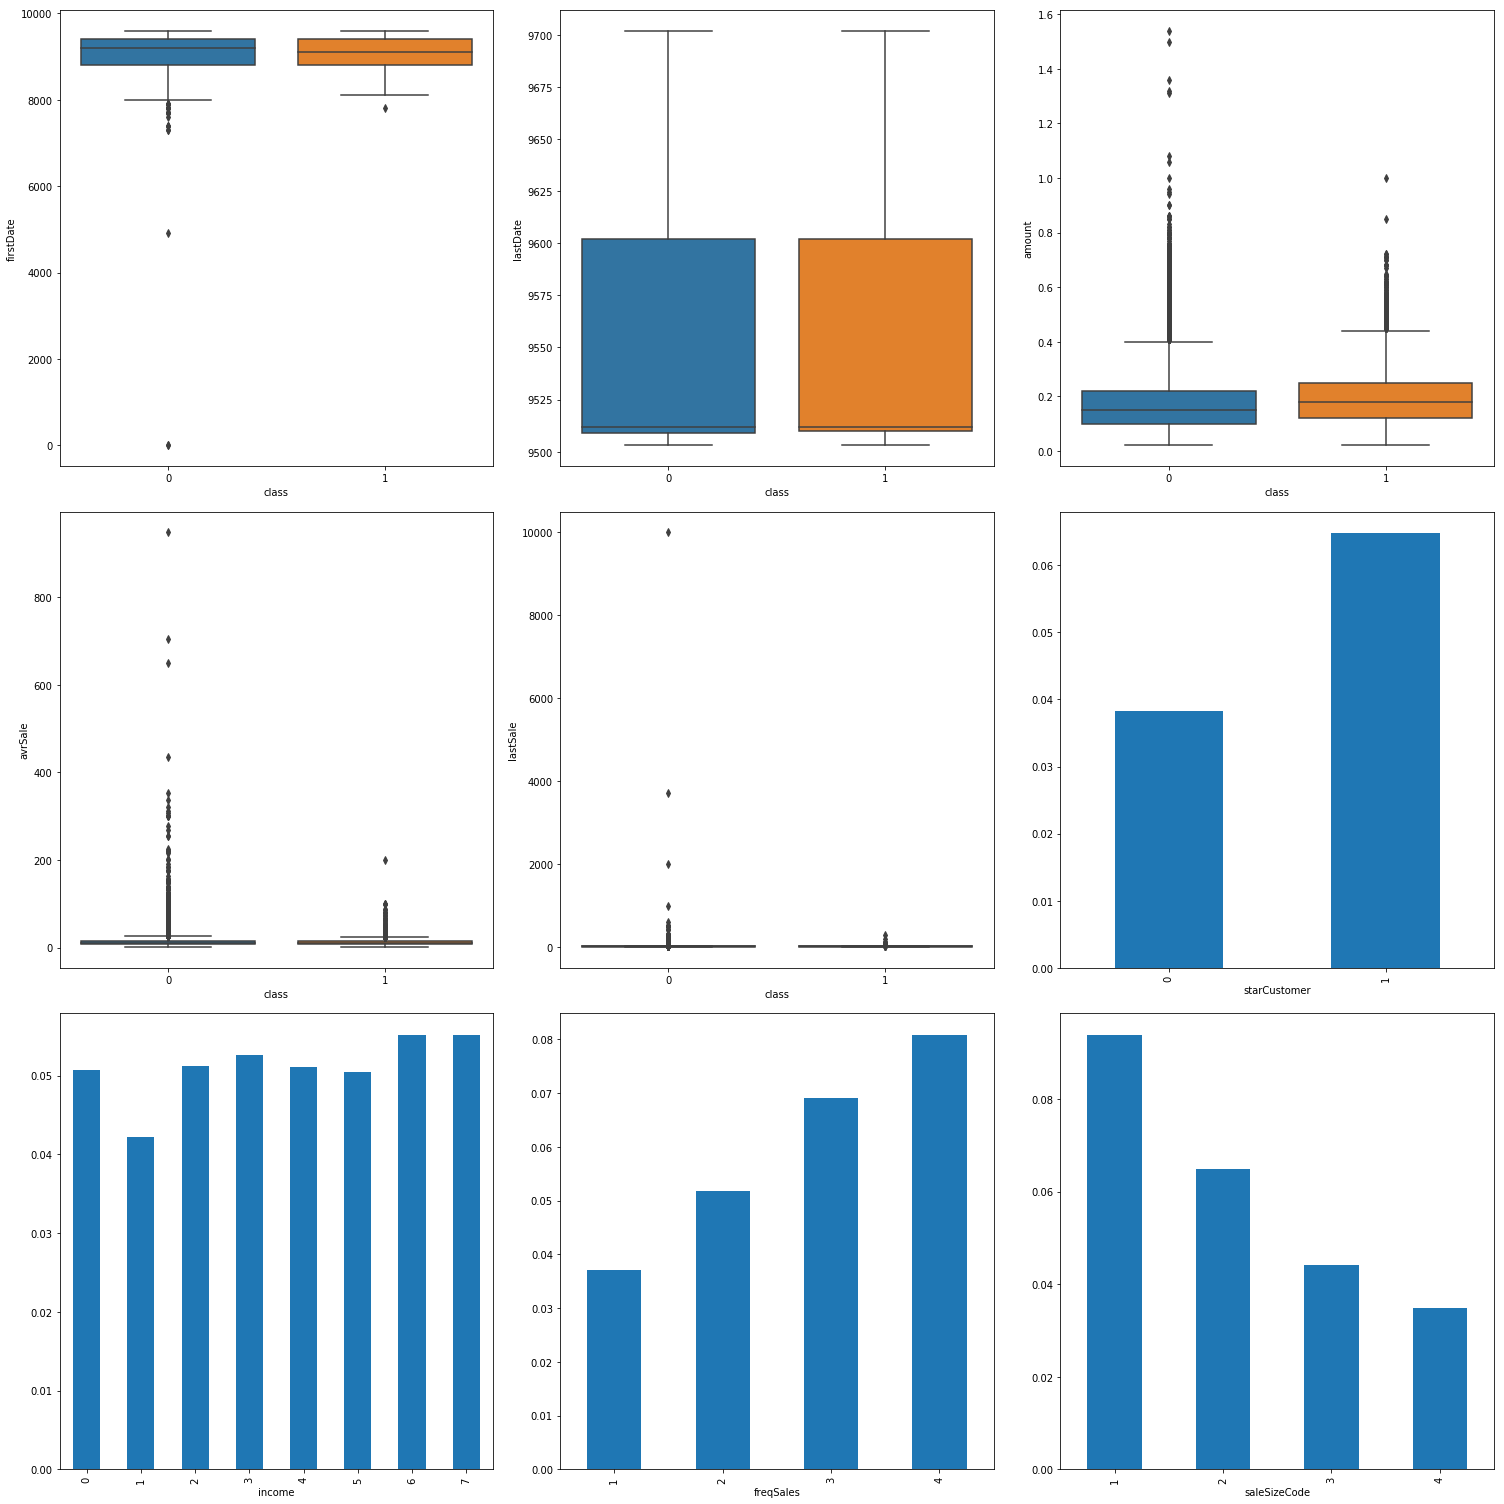

In [8]:
predictor_cols = metric_var + cat_var + quant_var

rows, cols = 3, 3
fig, axis = pt.subplots(nrows=rows, ncols=cols, figsize=(7*cols, 7*rows))
axis = axis.flatten()
posn = 0

for cols in (metric_var):
    sns.boxplot(target, cols, data=df, ax=axis[posn])
    axis[posn].set_ylabel(cols)
    posn += 1
    
for cols in (cat_var + quant_var):
    df.groupby(cols)[target].mean().plot(kind="bar", ax=axis[posn])
    posn += 1
    

pt.tight_layout()

OK so from that we can tell a few things: firstDate, lastDate, lastSale, income, and avrSale have relatively little impact on whether or not someone picks a subscription or not.

Amount of sales has a small impact.

starCustomer status, the frequency of sales, and sale size have the largest impact on whether or not someone purchases a subscription

As such, lets make a new df that only contains useful items

In [9]:
useless_columns = ["firstDate", "lastDate", "lastSale", "income", "avrSale"]

df = df.drop(columns=useless_columns)

In [10]:
df

amount  freqSales saleSizeCode  starCustomer  class
0        0.06          1            4             0      0
1        0.16          4            4             1      1
2        0.20          4            2             0      0
3        0.13          2            4             0      0
4        0.10          1            4             0      0
...       ...        ...          ...           ...    ...
99995    0.18          3            4             1      0
99996    0.12          2            3             1      0
99997    0.23          4            3             1      0
99998    0.12          2            4             0      1
99999    0.39          3            1             1      0

[100000 rows x 5 columns]

In [11]:
#lets define our predictor and target columns
predictor_cols = ["amount", "freqSales", "saleSizeCode", "starCustomer"]
target_cols = "class"

In [12]:
#lets split up our train and test sets
target = ["class"]
x, y = df[predictor_cols].values, df[target_cols].values
shuffle_index = np.random.permutation(100000)
x, y = x[shuffle_index], y[shuffle_index]
x = pd.DataFrame(x, columns=predictor_cols)
y = pd.DataFrame(y, columns=target)

x_train, y_train = x[:70000], y[:70000]
x_test, y_test = x[70000:], y[70000:]

<h1>Machine Learning Modeling and Evaluation</h1>

<strong>The models covered will be:</strong>
<br>
Logistic Regression
<br>
Support Vector Machines
<br>
Decision Tree Classifier
<br>
Gaussian Naive Bayes Classifier


<strong>Required metrics will be:</strong>
<br>
Test Error Rate 
<br>
ROC Curve
<br>
Confusion Matrix
<br>
Precision Recall Curve

<h2>Logistic Regression</h2>

In [13]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver="newton-cg", multi_class='multinomial', random_state=42)
# logit = LogisticRegression(solver="newton-cg", random_state=42)
logit.fit(x_train, y_train.values.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

<h3>Cross Val Score</h3>

In [14]:
from sklearn.model_selection import cross_val_score
logit_df_score = logit.decision_function(x_test)
logit_cv_score = cross_val_score(logit, x_test, y_test.values.ravel(), cv = 5)
logit_cv_score

array([0.9481753 , 0.9481753 , 0.94833333, 0.94832472, 0.94832472])

<h3>ROC Curve</h3>

In [15]:
def plot_roc_curve(fpr, tpr, thresholds, label=None):
    pt.plot(fpr,tpr, 'g', linewidth=1.5, label="TPR")
    pt.plot([0,1], [0,1], 'b--')
    pt.xlabel("False Positive Rate")
    pt.ylabel("True Positive Rate")
    pt.legend()
    pt.title(label)
    pt.show()

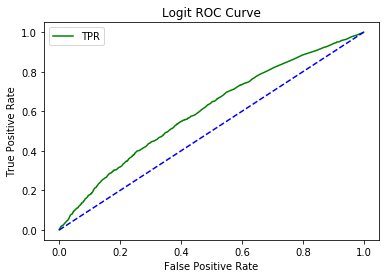

In [16]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test.values.ravel(), logit_df_score)
plot_roc_curve(fpr, tpr, thresholds, label="Logit ROC Curve")

In [17]:
from sklearn.metrics import auc
logit_area = auc(fpr, tpr)
logit_area

0.6022691610230422

<h3>Precision Recall Curve</h3>

In [18]:
def plot_precision_recall_curve(precisions, recalls, thresholds, label=None):
    pt.plot(thresholds, precisions[:-1], 'b', linewidth=1.5, label="Precisions")
    pt.plot(thresholds, recalls[:-1], 'g--', linewidth=1.5, label="Recalls")
    pt.title(label)
    pt.legend(loc="center left")
    pt.xlabel("Threshold")
    pt.ylim([0,1])
    pt.show()

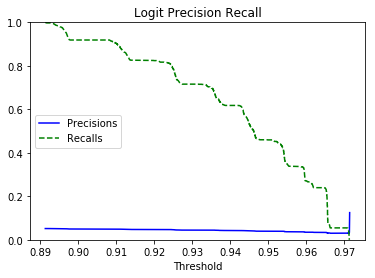

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
logit_probas = logit.predict_proba(x_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, logit_probas[:,0])
plot_precision_recall_curve(precisions, recalls, thresholds, label="Logit Precision Recall")

<h3>Confusion Matrix</h3>

In [20]:
from sklearn.metrics import confusion_matrix
logit_pred = logit.predict(x_test)
logit_conf_mx = confusion_matrix(y_test, logit_pred)
logit_conf_mx

array([[28448,     0],
       [ 1552,     0]])

In [21]:
def plot_confusion_matrix(conf_mx):
    pt.matshow(conf_mx, cmap=pt.cm.gray)
    pt.show()

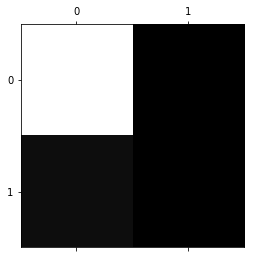

In [22]:
plot_confusion_matrix(logit_conf_mx)

<h1>Support Vector Machine</h1>

In [23]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc = svc.fit(x_train, y_train.values.ravel())

In [24]:
svc_cv_score = cross_val_score(svc, x_test, y_test, cv=5)
svc_cv_score

/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

array([0.9481753 , 0.9481753 , 0.94833333, 0.94832472, 0.94832472])

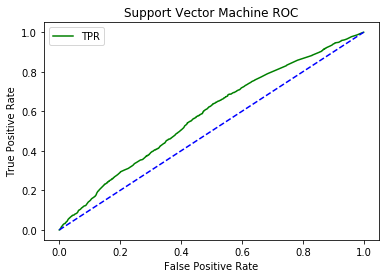

In [25]:
svc_df_scores = svc.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, svc_df_scores)
plot_roc_curve(fpr, tpr, thresholds, label="Support Vector Machine ROC")

In [26]:
svc_area = auc(fpr, tpr)
svc_area

0.5797805119922188

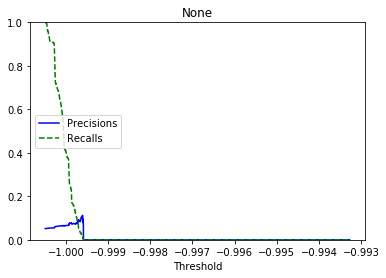

In [27]:
svc_pred = svc.predict(x_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, svc_df_scores)
plot_precision_recall_curve(precisions, recalls, thresholds)

In [28]:
svc_conf_mx = confusion_matrix(y_test, svc_pred)
svc_conf_mx

array([[28448,     0],
       [ 1552,     0]])

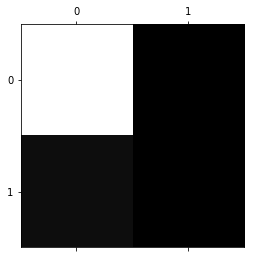

In [29]:
plot_confusion_matrix(svc_conf_mx)

<h1>Gausian Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb = gnb.fit(x_train, y_train.values.ravel())
scoreGNB = gnb.score(x_test, y_test)
print(scoreGNB)

0.9389666666666666


In [31]:
gnb_cv_score = cross_val_score(gnb, x_test, y_test, cv=10)
gnb_cv_score

/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

array([0.94301899, 0.94201933, 0.94333333, 0.942     , 0.942     ,
       0.94166667, 0.93966667, 0.94566667, 0.93597866, 0.93897966])

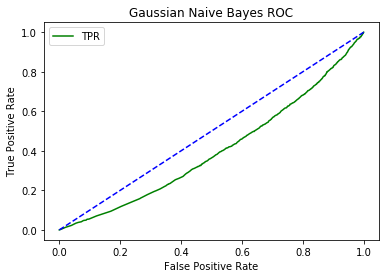

In [32]:
y_scores = gnb.predict_proba(x_test) #returns the probability and 1-probability in a 2d array
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,0]) #so just take the first column
plot_roc_curve(fpr,tpr,threshold, label="Gaussian Naive Bayes ROC")

In [33]:
area = auc(fpr, tpr)
area

0.4011738636165969

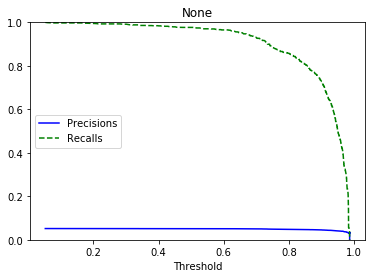

In [34]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[:,0])
plot_precision_recall_curve(precisions, recalls, thresholds)

In [35]:
y_pred = cross_val_predict(gnb, x_test, y_test, cv=3)
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mycicle/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[28218,   230],
       [ 1525,    27]])

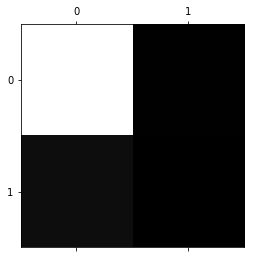

In [36]:
pt.matshow(conf_mx, cmap=pt.cm.gray)
pt.show()

<h1>Decision Tree Classifier</h1>

In [37]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree = tree.fit(x_train, y_train.values.ravel())

In [38]:
scoreTree = tree.score(x_train, y_train)
print(scoreTree)

0.9499142857142857


In [39]:
tree_cv_score = cross_val_score(tree, x_train, y_train, cv=10)
tree_cv_score

array([0.94900728, 0.94915012, 0.94929296, 0.94900728, 0.94915012,
       0.94927847, 0.94884984, 0.94942135, 0.94899271, 0.94913559])

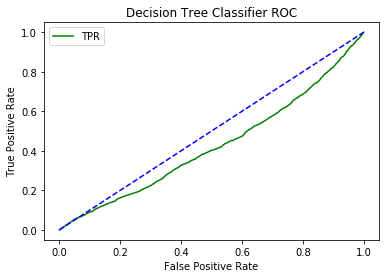

In [40]:
y_scores = tree.predict_proba(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,0])
plot_roc_curve(fpr, tpr, thresholds, label="Decision Tree Classifier ROC")

In [41]:
area = auc(fpr, tpr)
area

0.42686320011987866

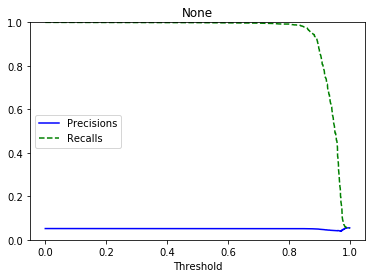

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores[:,0])
plot_precision_recall_curve(precisions, recalls, thresholds)

In [43]:
y_pred = cross_val_predict(tree, x_test, y_test, cv=3)
conf_mx = confusion_matrix(y_test, y_pred)
conf_mx

array([[28410,    38],
       [ 1548,     4]])

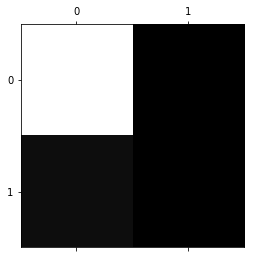

In [44]:
pt.matshow(conf_mx, cmap=pt.cm.gray)
pt.show()

In general  the gaussian naive bayes lassifier worked teh best, however there may have been some variable mistakes as the curves generated are highly anomalous. More testing will need to be done because of the difference between teh reported scores and accuracy and what the curves show. Confusion matricies show good results